In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
from benchmarking.data import dataset_loaders, DatasetGroup
from benchmarking.run_benchmarks import run_eval
from benchmarking.utils import combine_method_overviews_from_csv

In [5]:
data_path = Path(module_path, 'hnne_datasets')
## Load small, medium or large datasets, see ./hnne/benchmarking/data.py
loaders = dataset_loaders(dataset_group=DatasetGroup.small)
loaders.keys()

dict_keys(['coil_20', 'shuttle', 'mnist', 'fmnist'])

# Set benchmarking settings

In [6]:
dataset_group = DatasetGroup.small

hnne_version = "v2"  # or "v1"

start_cluster_view='auto'

# Optional
v2_size_threshold=None,

experiment_name = f'hnne_v2_packlevel_{start_cluster_view}' if hnne_version == "v2" else 'hnne_v1'

output_directory = Path(module_path, "benchmark_results", str(dataset_group))

In [7]:
experiment_name

'hnne_v2_packlevel_auto'

### run benchmark

Loading coil_20...
Finch time: 0.8794035419996362, projection time: 7.285472749994369
Validating coil_20 on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 24.00it/s]


Exporting projection plots...
Loading shuttle...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Finch time: 8.773775125009706, projection time: 1.410193874995457
Validating shuttle on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:43<00:00,  1.08s/it]


Exporting projection plots...
Loading mnist...
Finch time: 7.832648208015598, projection time: 41.66435770798125
Validating mnist on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:54<00:00,  1.37s/it]


Exporting projection plots...
Loading fmnist...
Finch time: 4.702893959009089, projection time: 7.895016624999698
Validating fmnist on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:36<00:00,  1.08it/s]


Exporting projection plots...


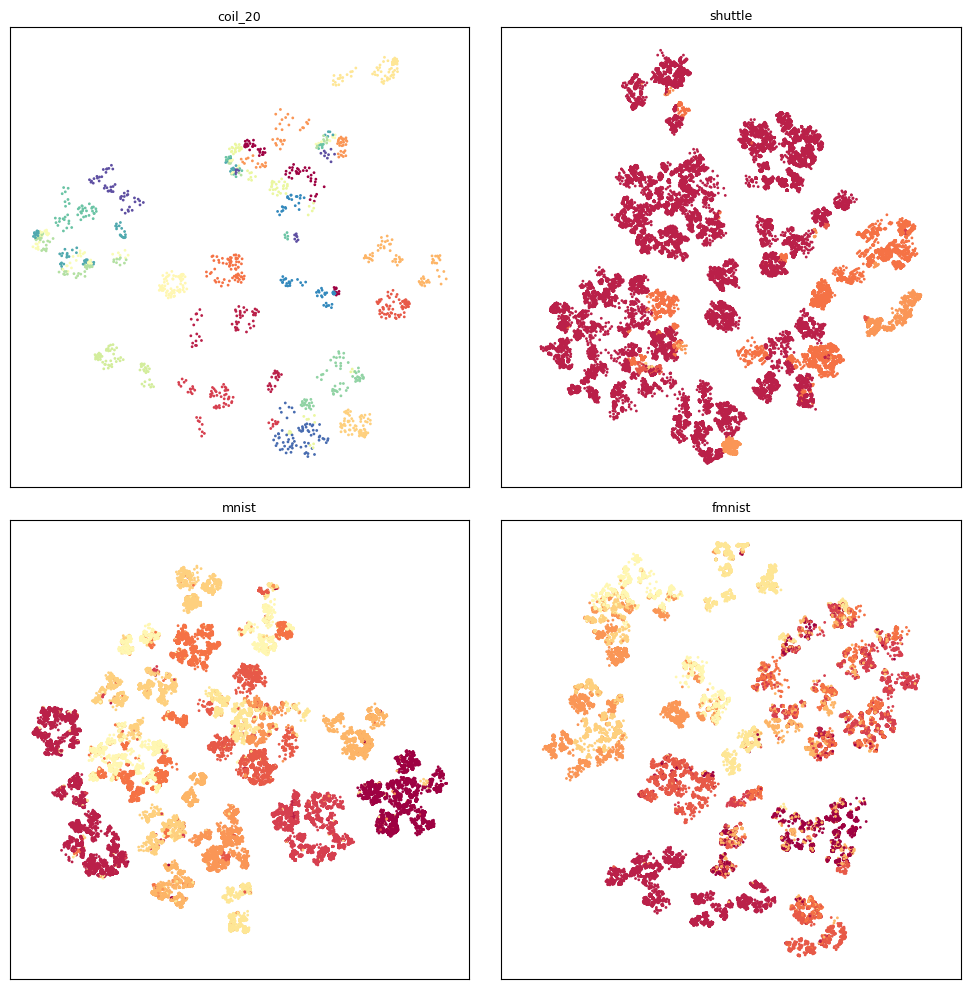

In [8]:
scores, plt = run_eval(
                data_path=data_path,
                dataset_group=dataset_group,
                n_components=2,
                distance="cosine",
                radius=0.4,
                ann_threshold=20_000,
                preliminary_embedding="pca",
                validate_only_1nn=False,     
                compute_trustworthiness=True,
                random_state=42,
                verbose=False,
            
                # hnne v2 params
                prefered_num_clust= None, ## set_ncluster_view ...  
                hnne_version = hnne_version,
                start_cluster_view=start_cluster_view,
                v2_size_threshold=v2_size_threshold,
                # save params
                save_experiment=True,
                plot_projection=True,            
                experiment_name=experiment_name,
                output_directory=output_directory,
                points_plot_limit =5000_000,
                figsize=(5, 5),
                skip_done=False,
                scale_data=False,
)

In [9]:
print(scores.to_string())

           KNN accuracy                                                                                     
                   1-nn            3-nn            5-nn           10-nn trustworthiness proj_time finch_time
dataset                                                                                                     
coil_20  0.945 (±0.018)  0.958 (±0.016)  0.946 (±0.019)  0.925 (±0.018)        0.989720        7s     879 ms
shuttle  0.996 (±0.001)  0.996 (±0.001)  0.996 (±0.001)  0.995 (±0.001)        0.965891        1s         8s
mnist    0.950 (±0.002)  0.963 (±0.002)  0.964 (±0.002)  0.962 (±0.002)        0.980370       41s         7s
fmnist   0.809 (±0.006)  0.833 (±0.004)  0.838 (±0.005)  0.839 (±0.005)        0.953698        7s         4s


## display a combined overview of different h-NNE variants runs

In [35]:
method_csvs = [
    ("hnne_v1", Path(output_directory, "hnne_v1", "scores","all_datasets_scores.csv")),
    ("hnne_v2", Path(output_directory, "hnne_v2_packlevel_50-500_clusters", "scores","all_datasets_scores.csv")),
    ("hnne_v2(k_3)", Path(output_directory, "hnne_v2_packlevel_50-500_k_3", "scores","all_datasets_scores.csv")),
     ]
output_csv_path = Path(output_directory,'combined_overview.csv')
combined_overview = combine_method_overviews_from_csv(
                                        method_csvs,
                                        output_csv_path,
                                        knn_cols=("1-nn",), # "10-nn"
                                        trust_col="trustworthiness",
                                        #proj_time_col="proj_time",
                                        knn_group_name="KNN accuracy",
                                    )

In [36]:
combined_overview

KNN acc (1-nn)                                 trustworthiness  \
                hnne_v1         hnne_v2    hnne_v2(k_3)         hnne_v1   
coil_20  0.960 (±0.014)  0.945 (±0.018)  0.945 (±0.018)        0.987783   
fmnist   0.815 (±0.005)  0.809 (±0.006)  0.809 (±0.006)        0.956779   
mnist    0.955 (±0.002)  0.950 (±0.002)  0.950 (±0.002)        0.982638   
shuttle  0.997 (±0.001)  0.996 (±0.001)  0.996 (±0.001)        0.967825   

                               proj_time                       
          hnne_v2 hnne_v2(k_3)   hnne_v1 hnne_v2 hnne_v2(k_3)  
coil_20  0.989634     0.989634    541 ms      3s           4s  
fmnist   0.954257     0.954531        1s      2s           2s  
mnist    0.979928     0.979661        1s      3s          14s  
shuttle  0.965527     0.965345        1s      1s           1s